# *Contextualización*

El siguiente código permite resolver las ecuaciones de Navier-Stokes para el problema propuesto, donde el flujo circula por una cavidad cuadrada en dos dimensiones, con una tapa que se desplaza con velocidad *Uo*. Debido a la condición de no-deslizamiento, el movimiento de la tapa arrastra al fluido generando estructuras vórticales que son muy características dentro de la cavidad, dependiendo del número de Reynolds.


In [4]:
#Importación de librerías.
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import sparse
from scipy.sparse.linalg import spsolve
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
import time
import sys


El flujo de trabajo será incompresible, por lo que nos produce una complicación entre la relación de la presión y las variables termodinámicas. Para poder resolver este problema se utilizará el método de proyección, el cual está compuesto por un paso de predicción y otra de corrección, además de incluir una condición adicional que fuerza la incompresibilidad. Estas serán más detallas en el informe.

Procedamos a desarrollar el Método de proyección:

# *Problema Propuesto*
Modelen el flujo dentro de una cavidad de 2 × 2m cuya tapa se mueve
con velocidad u0 = 1m/s. La densidad del fluido es 1 kg/m3, su viscosidad
cinemática ν = 0.1 m/s2, y se puede considerar como incompresible. Utilicen
una malla de 41 × 41 puntos y un paso de tiempo ∆t = 0.001s.

Número de Reynolds: 20
Número de Courant:  0.02
Número de Difusión:  0.07999999999999999
Número de Peclet:  0.25000000000000006


Se analiza el comportamiento del flujo para los casos presentados en la sección N°4, para demostrar como funciona el programa se usara el caso de tiempo de 10.000.

In [14]:
#Paso de tiempo 10000
flag= True
nt =10000
U_inicial = np.zeros((ny,nx))
U_inicial[-1,:] = np.full(nx,u_0)
V_inicial = np.zeros((ny,nx))
P = np.zeros((ny,nx))

Re = int(u_0*Lx/mu)
print(f'Número de Reynolds: {Re}')
start_time = time.time()

u,v,P,Res_u,Res_v,Res_div,Steady = metodo(U_inicial,V_inicial,nt,A,u_0,flag)
#u,v,P,Res_u,Res_v,Res_div,Steady = metodo(u,v,nt,A,u_0,flag)

print(f'Duration: {np.round(time.time()-start_time,3)} seconds')

Número de Reynolds: 20
Duration: 48.448 seconds


Estado después de 10.0 segundos


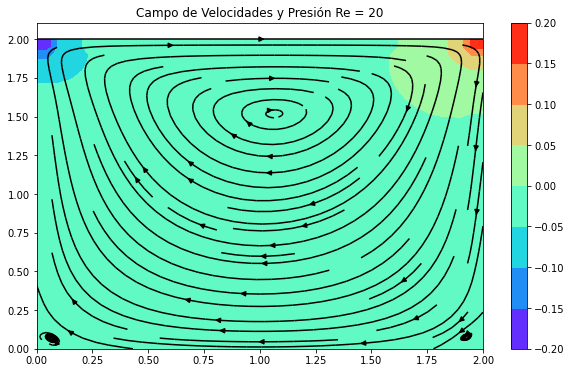

In [15]:
print(f'Estado después de {nt*dt} segundos')

x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)

X,Y = np.meshgrid(x,y)

plt.streamplot(X, Y, u, v, color='k', density=1)

plt.contourf(X,Y,P/np.linalg.norm(P), cmap="rainbow")
plt.colorbar()

plt.title(f'Campo de Velocidades y Presión Re = {Re}');

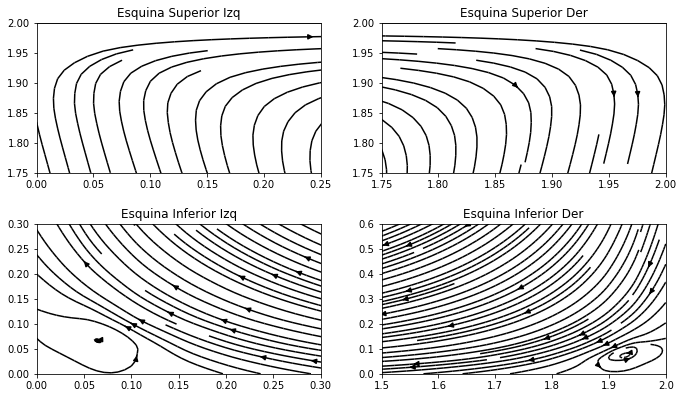

In [16]:
fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=3.0)

ax[0,0].streamplot(X,Y,u,v, density=4, color='k')
ax[0,0].set_ylim([1.75, 2])
ax[0,0].set_xlim([0,0.25])
ax[0,0].set_title('Esquina Superior Izq')

ax[0,1].streamplot(X,Y,u,v, density=4, color='k')
ax[0,1].set_ylim([1.75, 2])
ax[0,1].set_xlim([1.75,2])
ax[0,1].set_title('Esquina Superior Der')

ax[1,0].streamplot(X,Y,u,v, density=6 , color='k')
ax[1,0].set_ylim([0,0.3])
ax[1,0].set_xlim([0,0.3])
ax[1,0].set_title('Esquina Inferior Izq')

ax[1,1].streamplot(X,Y,u,v, density=5, color='k')
ax[1,1].set_ylim([0,0.6])
ax[1,1].set_xlim([1.5,2])
ax[1,1].set_title('Esquina Inferior Der');

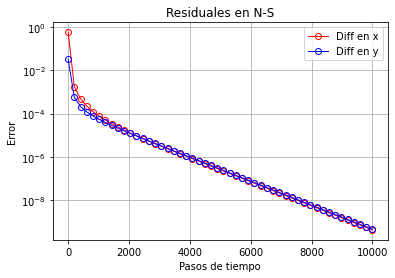

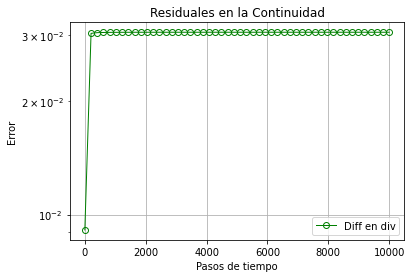

In [17]:
#Residuales

a = int(nt*40/2000)
if a<1:
    a = 1
xe = np.linspace(1,nt,len(Res_u[::a]))


plt.plot(xe,Res_u[::a], label="Diff en x", linewidth=1, marker='o',color='r', fillstyle='none')
plt.plot(xe,Res_v[::a], label="Diff en y", linewidth=1, marker='o',color='b', fillstyle='none')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Pasos de tiempo')
plt.ylabel('Error')
plt.title("Residuales en N-S")
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show();

plt.plot(xe,Res_div[::a], label="Diff en div", linewidth=1, color='g',fillstyle='none',marker='o')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Pasos de tiempo')
plt.ylabel('Error')
plt.title("Residuales en la Continuidad")
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show();


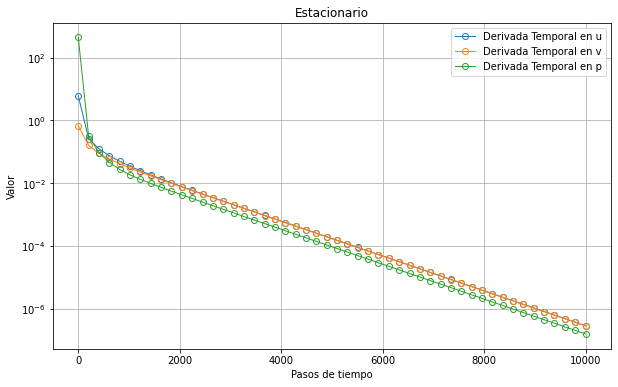

In [18]:
L = ['u','v','p']
for i in range(3):
    plt.plot(xe,Steady[i,::a], label=f'Derivada Temporal en {L[i]}', linewidth=1,marker='o',fillstyle='none')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Pasos de tiempo')
plt.ylabel('Valor')
plt.title("Estacionario");

In [19]:
#vorticidad



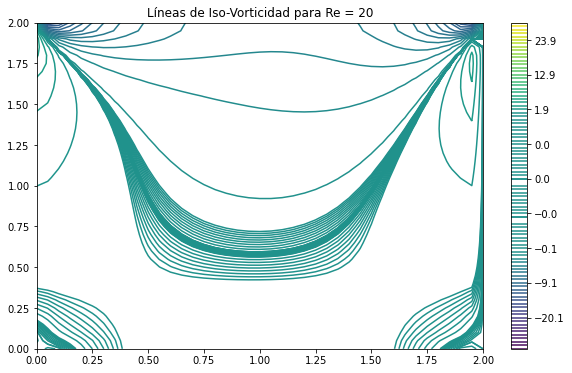

In [20]:
contours1 = np.arange(-0.01,0.01,0.001)
contours2 = np.arange(-0.1,0.1,0.01)
contours3 = np.arange(-30,30,1.1)
contours = np.concatenate((contours1,contours2,contours3))
contours = np.sort(contours)

plt.contour(X,Y,w, contours)
plt.colorbar()

plt.title(f'Líneas de Iso-Vorticidad para Re = {Re}');

In [22]:
# Intento de encontrar la función corriente para graficarla.

        

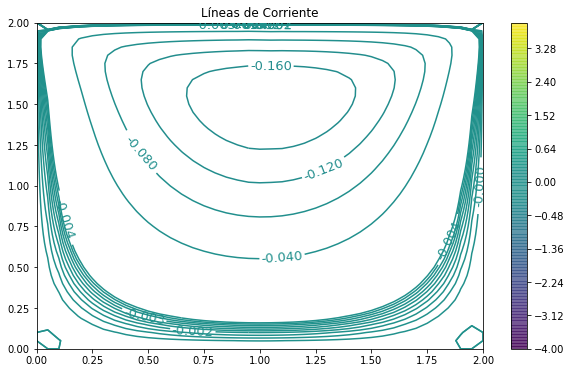

In [23]:
contours1 = np.arange(-0.004,0.00001,0.0004)
contours2 = np.arange(0.00001,0.002,0.0004)
contours3 = np.arange(-4,4,0.04)
contours = np.concatenate((contours1,contours2,contours3))
contours = np.sort(contours)

C1 = plt.contour(X,Y,psi, contours)
plt.clabel(C1, inline=1, fontsize=13)
#plt.contourf(X,Y,psi)
plt.colorbar()
plt.title("Líneas de Corriente");

Número de Courant:  0.02
Número de Difusión:  0.07999999999999999
Número de Peclet:  0.25000000000000006


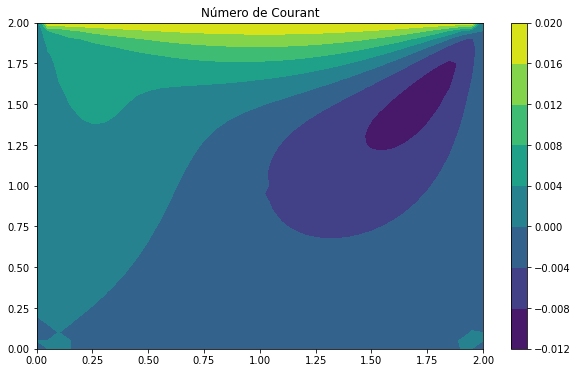

In [24]:
C = u*dt/dx + v*dt/dy 

CFL_diff = mu*dt/dx**2 + mu*dt/dy**2

print('Número de Courant: ',np.max(C))
print('Número de Difusión: ',CFL_diff)

Pe = C/CFL_diff
print('Número de Peclet: ', np.max(Pe))


plt.contourf(X,Y,C)
plt.title('Número de Courant')
plt.colorbar();


Se analiza el comportamiento del flujo para los casos presentados en la sección N°6.3, para demostrar como funciona el programa se usara los valores de Reynolds de 100 y 400.

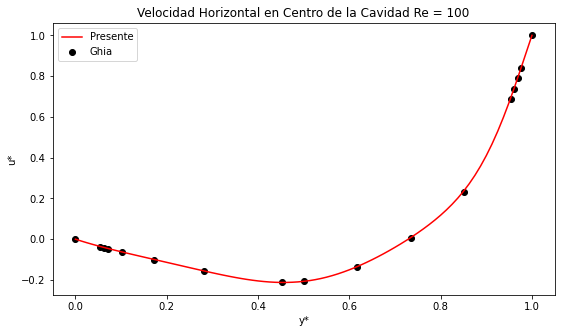

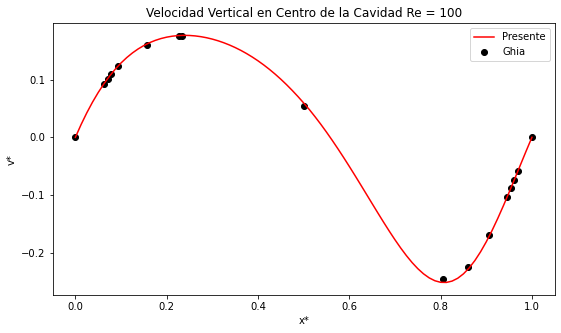

In [ ]:
#100
dy_g = 1/128
u_0z = 1
y_ghia = (np.array([1,8,9,10,14,23,37,59,65,80,95,110,123,124,125,126,129])-1)*dy_g
u_ghia = np.array([0,-0.03717,-0.04192,-0.04775,-0.06434,-0.10150,-0.15662,-0.21090,-0.20581,-0.13641,0.00332,0.23151,0.68717,0.73722,0.78871,0.84123,1 ])*u_0z

plt.scatter(y_ghia,u_ghia,color='k', marker='o',label='Ghia')
e = [0.3]*len(y_ghia)
#plt.errorbar(y_ghia, u_ghia, yerr=e, fmt='o',color='k')
plt.plot(y/Lx,u[:,40]/u_0,color='r', label="Presente")
plt.title(f'Velocidad Horizontal en Centro de la Cavidad Re = {Re}')
plt.legend()
plt.xlabel('y*')
plt.ylabel('u*')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.show()

dx_g = 1/128
x_ghia = (np.array([1,9,10,11,13,21,30,31,65,104,111,117,122,123,124,125,129])-1)*dx_g
v_ghia = np.array([0,0.09233,0.10091,0.10890,0.12317,0.16077,0.17507,0.17527,0.05454,-0.24533,-0.22445,-0.16914,-0.10313,-0.08864,-0.07391,-0.05906,0])*u_0z

plt.scatter(x_ghia,v_ghia,color='k', marker='o',label='Ghia')
plt.plot(x/Lx,v[40,:]/u_0,color='r',label='Presente')
plt.title(f'Velocidad Vertical en Centro de la Cavidad Re = {Re}')
plt.legend()
plt.xlabel('x*')
plt.ylabel('v*')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.show()

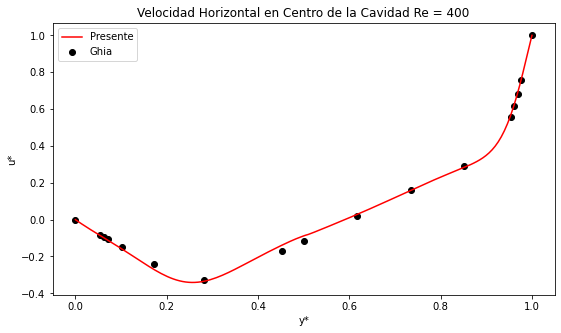

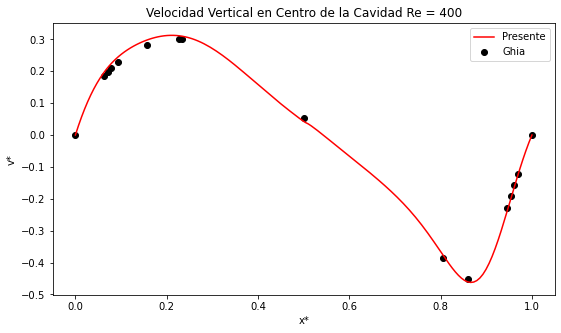

In [ ]:
#400
dy_g = 1/128
u_0z = 1
y_ghia = (np.array([1,8,9,10,14,23,37,59,65,80,95,110,123,124,125,126,129])-1)*dy_g
u_ghia = np.array([0,-0.08186,-0.09266,-0.10338,-0.14612,-0.24299,-0.32726,-0.17119,-0.11477,0.02135,0.16256,0.29093,0.55892,0.61756,0.68439,0.75837,1])*u_0z

plt.scatter(y_ghia,u_ghia,color='k', marker='o',label='Ghia')
e = [0.3]*len(y_ghia)
#plt.errorbar(y_ghia, u_ghia, yerr=e, fmt='o',color='k')
plt.plot(y/Lx,u[:,75]/u_0,color='r', label="Presente")
plt.title(f'Velocidad Horizontal en Centro de la Cavidad Re = {Re}')
plt.legend()
plt.xlabel('y*')
plt.ylabel('u*')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.show()

dx_g = 1/128
x_ghia = (np.array([1,9,10,11,13,21,30,31,65,104,111,122,123,124,125,129])-1)*dx_g
v_ghia = np.array([0,0.18360,0.19713,0.20920,0.22965,0.28124,0.30203,0.30174,0.05186,-0.38598,-0.44993,-0.22847,-0.19254,-0.15663,-0.12146,0])*u_0z

plt.scatter(x_ghia,v_ghia,color='k', marker='o',label='Ghia')
plt.plot(x/Lx,v[75,:]/u_0,color='r',label='Presente')
plt.title(f'Velocidad Vertical en Centro de la Cavidad Re = {Re}')
plt.legend()
plt.xlabel('x*')
plt.ylabel('v*')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.show()

In [ ]:
#Variacion de la geometria

L_Ly = [1,2,3]
L_u = list()
L_v = list()
L_p = list()

for l in L_Ly:
    print(l)
    Ly = l
    dt = 0.0005
    nx = 81
    ny = 81
    u = np.zeros((ny,nx))
    v = np.zeros((ny,nx))
    dx = Lx/(nx-1)
    dy = Ly/(ny-1)

    A = generate_Matrix(nx,ny,dx,dy)
    print('Matriz lista')
    
    flag= True
    nt =15000 # 2163 para u = 10
    U_inicial = np.zeros((ny,nx))
    U_inicial[-1,:] = np.full(nx,u_0)
    V_inicial = np.zeros((ny,nx))
    P = np.zeros((ny,nx))

    Re = int(u_0*Lx/mu)
    print(f'Número de Reynolds: {Re}')
    start_time = time.time()

    #u,v,P,Res_u,Res_v,Res_div,Steady = metodo(U_inicial,V_inicial,nt,A,u_0,flag)
    u,v,P,Res_u,Res_v,Res_div,Steady = metodo(u,v,nt,A,u_0,flag)
    
    L_u.append(u.copy())
    L_v.append(v.copy())
    L_p.append(P.copy())
    
    print(f'Duration: {np.round(time.time()-start_time,3)} seconds')

1
2
3
Matriz lista
Número de Reynolds: 100
Duration: 423.48 seconds


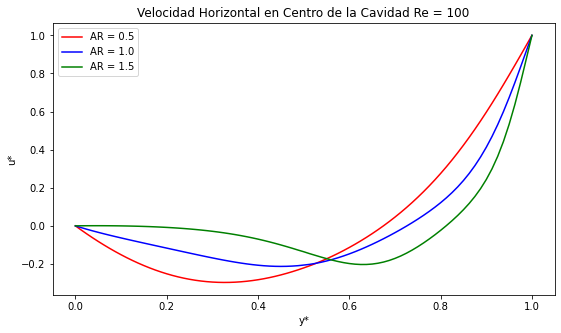

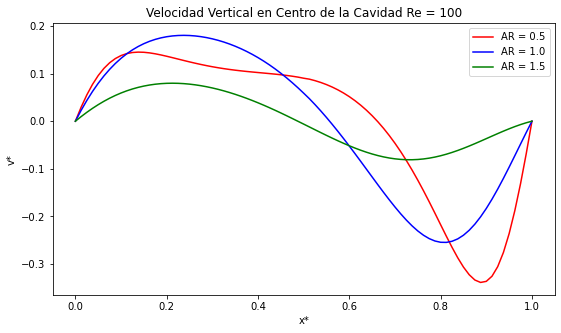

In [ ]:
x = np.linspace(0,1,nx)
col = ['r','b','g']


for j in range(0,3):
    AR = L_Ly[j]/Lx
    plt.plot(x,L_u[j][:,40]/u_0,label=f'AR = {L_Ly[j]/Lx}', color = col[j])
    plt.title(f'Velocidad Horizontal en Centro de la Cavidad Re = {Re}')
    plt.legend()
    plt.xlabel('y*')
    plt.ylabel('u*')
    fig = plt.gcf()
    fig.set_size_inches(9,5)
    
plt.show()
for j in range(0,3):
    AR = L_Ly[j]/Lx
    plt.plot(x,L_v[j][40,:]/u_0,label=f'AR = {L_Ly[j]/Lx}', color=col[j])
    plt.title(f'Velocidad Vertical en Centro de la Cavidad Re = {Re}')
    plt.legend()
    fig = plt.gcf()
    plt.xlabel('x*')
    plt.ylabel('v*')
    fig.set_size_inches(9,5)
    
plt.show()


Estado después de 7.5 segundos


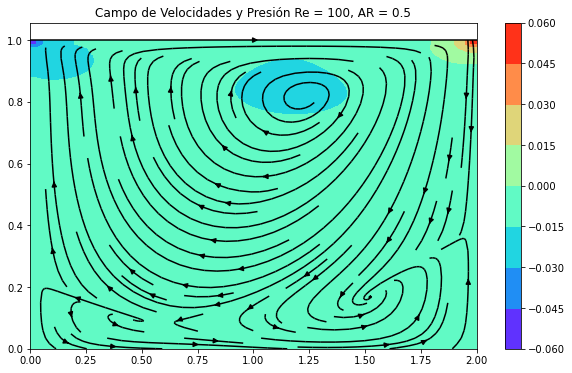

Estado después de 7.5 segundos


IndexError: list index out of range

In [ ]:

for j in range(3):
    Ly = L_Ly[j]

    print(f'Estado después de {nt*dt} segundos')

    x = np.linspace(0,Lx,nx)
    y = np.linspace(0,Ly,ny)

    X,Y = np.meshgrid(x,y)

    u = L_u[j].copy()
    v = L_v[j].copy()
    P = L_p[j].copy()

    plt.streamplot(X, Y, u, v, color='k', density=1)

    plt.contourf(X,Y,P/np.linalg.norm(P), cmap="rainbow")
    plt.colorbar()

    plt.title(f'Campo de Velocidades y Presión Re = {Re}, AR = {Ly/Lx}')
    plt.show();

In [ ]:
#-------------------------------------------